# Categories for Quantum

Alexis Toumi & Giovanni de Felice

_5th May 2021, Tallcat_

1. Categorical quantum mechanics
    * the miracle of scalars
    * the way of the dagger
    * braids and symmetry
    * compact closed categories
    * special commutative Frobenius algebras
    * bialgebras & Hopf algebras
2. Qubit quantum computing
    * the circuit model
    * the ZX-calculus
3. Applications
    * optimisation
    * compilation
    * extraction
    * natural language processing
    

## Categorical quantum mechanics

The traditional formulation of quantum theory happens in $\mathbf{Hilb}$, the monoidal category of Hilbert spaces and bounded linear maps with the tensor product.

Categorical quantum mechanics (CQM) seeks to make explicit precisely what structure is needed of $\mathbf{Hilb}$ in order to recover quantum theory.

**References:**

* _A categorical semantics of quantum protocols_, Abramsky & Coecke ([arXiv:0402130](https://arxiv.org/abs/quant-ph/0402130))
* _Categorical quantum mechanics_, Abramsky & Coecke ([arXiv:0808.1023](http://arxiv.org/abs/0808.1023))
* _Picturing quantum processes: a first course in quantum theory and diagrammatic reasoning_, Coecke & Kissinger (2017)
* _Categories for quantum theory: an introduction_, Heunen & Vicary (2019)

In the process, we get a diagrammatic language for quantum processes.

We also get a new intuition for monoidal categories:

* **Systems** are objects $A, B$, composition of systems is given by their tensor product $A \otimes B$.
* **Processes** are arrows $f : A \to B$, $g : B \to C$, with their sequential and parallel compositions $g \circ f$ and $f \otimes g$.
* **States** are arrows from the unit $v : 1 \to A$.
* **Effects** are arrows into the unit $e : A \to 1$.
* **Scalars** are endomorphisms of the unit $s : 1 \to 1$.

### The miracle of scalars

**Lemma:** Tensoring with a scalar is a natural transformation.

_Proof:_

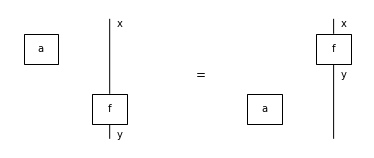

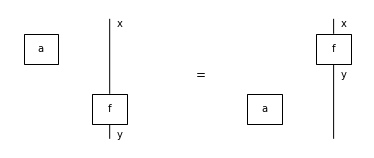

In [9]:
from discopy.monoidal import Ty, Box
from discopy.drawing import Equation

x, y, z = Ty(*"xyz")
f, g = Box('f', x, y), Box('g', y, z)
a, b, c, d = (Box(x, Ty(), Ty()) for x in 'abcd')

assert a @ x >> f == (f >> a @ y).normal_form()
Equation(a @ x >> f, f >> a @ y).draw(figsize=(5, 2))

**Lemma:** In a monoidal category, scalars form a commutative monoid.

_Proof:_ Eckmann-Hilton argument.

In [10]:
from discopy import drawing

assert (a @ b).interchange(0, 1) == b @ a
assert (a @ b).interchange(0, 1).interchange(0, 1) == a @ b

drawing.to_gif(a @ b, b @ a, loop=True, figsize=(.5, 1), path='../_static/monoidal/Eckmann-Hilton.gif')

**Definition:** A monoidal category is enriched in commutative monoids (com.mon. enriched) if every homset is a commutative monoid such that composition and tensor are monoid homomorphisms.

$$
(f + f') \otimes (g + g') = (f \otimes g) + (f' \otimes g) + (f \otimes g') + (f' \otimes g')
$$
$$
(f + f') \circ (g + g') = (f \circ g) + (f' \circ g) + (f \circ g') + (f' \circ g')
$$
$$0 \otimes f = 0 \circ f = 0 = f \circ 0 = f \otimes 0$$

In [11]:
from discopy.monoidal import Sum

zero = Sum((), Ty(), Ty())

assert zero + a == Sum((a, )) == a + zero
assert (a + b) + c == a + b + c == a + (b + c)
assert (a + b) @ (c + d) == (a @ c) + (a @ d) + (b @ c) + (b @ d)
assert (a + b) >> (c + d) == (a >> c) + (a >> d) + (b >> c) + (b >> d)

**Lemma:** In a com.mon. enriched monoidal category, the scalars form a commutative semiring.

**Definition:** A commutative semiring is a com.mon. enriched monoidal category with one object.

**Lemma:** Given a commutative semiring $\mathbb{S}$, the category $\mathbf{Mat}_\mathbb{S}$ of $\mathbb{S}$-valued matrices is monoidal with the Kronecker product.

**Lemma:** $\mathbf{FHilb} \simeq \mathbf{Mat}_\mathbb{C}$.

**Lemma:** $\mathbf{FRel} \simeq \mathbf{Mat}_\mathbb{B}$.

Com.mon. enrichment allows us to talk about **superposition**, **basis** and **dimension** in an abstract setting.

**Definition:** Given two states $v, w : 1 \to A$, their superposition is a linear combination $a \otimes v + b \otimes w : 1 \to A$ for two scalars $a, b : 1 \to 1$.

**Definition:** A basis for $A$ is a minimal set of states $\{\vert i \rangle : 1 \to A\}$ such that every state $w : 1 \to A$ is a linear combination $w = \sum_i a_i \otimes \vert i \rangle$ for some scalars $a_i : 1 \to 1$.

**Definition:** The dimension of a system is the cardinality of its smallest basis.

### The way of the dagger

**Definition:** A dagger is a contravariant involutive identity-on-objects monoidal functor.

In terms of diagrams, the dagger is the vertical reflexion.

We may draw asymmetric boxes to distinguish a generator from its dagger.

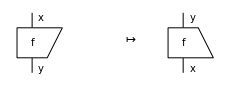

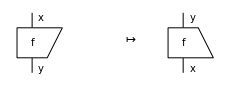

In [12]:
Equation(f, f[::-1], symbol="$\mapsto$").draw(asymmetry=.25, figsize=(3, 1))

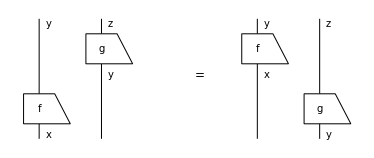

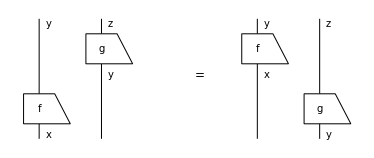

In [13]:
from discopy.monoidal import Id

assert Id(x)[::-1] == Id(x)
assert (f >> g)[::-1] ==  g[::-1] >> f[::-1]
assert (f @ g)[::-1].normal_form() ==  f[::-1] @ g[::-1]

Equation((f @ g)[::-1], f[::-1] @ g[::-1]).draw(figsize=(5, 2))

The dagger allows us to formulate the notion of inner product in an abstract setting.

**Definition:** The inner product of two states $w, w' : 1 \to A$ is the scalar $w^\dagger \circ w' : 1 \to 1$.

**Definition:** The squared norm of a state $w : 1 \to A$ is the scalar $w^\dagger \circ w$. It is normalised when it has norm $1$, the identity of the monoidal unit.

**Definition:** Two states $w, w' : 1 \to A$ are orthogonal when $w^\dagger \circ w' = 0$.

**Definition:** An isometry is a norm-preserving process $f : A \to B$, i.e. $f^\dagger \circ f = \text{id}_A$.

**Definition:** A unitary is an isomorphism $f : A \to B$ with inverse $f^\dagger$, i.e. $f^\dagger \circ f = \text{id}_A$ and $f \circ f^\dagger = \text{id}_B$.

**Definition:** A basis is orthonormal if $\langle i | j \rangle = \delta_{ij}$.

It also allows us to talk about quantum measurements, the Born rule and even a simple form of Heisenberg's uncertainty principle!

**Definition:** A projector is a process $p : A \to A$ such that $p = p^\dagger$ and $p \circ p = \text{id}_A$.

**Example:** Take $w \circ w^\dagger : A \to A$ for any normalised state $w : 1 \to A$.

**Definition:** A (projection-valued) measurement is a set of projectors $\{p_i : A \to A\}$ such that $\sum p_i = \text{id}_A$.

**Example:** Take an orthonormal basis $\{\vert i \rangle\}$ then $\{\vert i \rangle \langle i \vert\}$ is a measurement.

**Lemma:** A measurement is a choice of basis and a partition of it.

**Definition (Born rule):** Given a normalised state $w : 1 \to A$ and a measurement $\{p_i : A \to A\}$, the probability of measuring outcome $i$ and getting the state $p_i(w)$ as a result is $P(i \vert w) = w^\dagger \circ p_i \circ w$.

**Example:** Take $p_i = v \circ v^\dagger$ then we get the squared amplitude $P(v \vert w) = \langle w \vert v \rangle^2$.

**Definition:** Two bases are complementary (a.k.a. mutually unbiased) if $P(i \vert j) = P(i' \vert j')$ for all $i, i'$ and $j, j'$.

**Example:** Take  $\{\vert 0 \rangle, \vert 1 \rangle\}$ and $\{\vert + \rangle, \vert - \rangle\}$ the two bases of $\mathbb{C}^2$ with:

$$\vert + \rangle = \frac{\vert 0 \rangle + \vert 1 \rangle}{\sqrt{2}}
\quad and \quad
\vert - \rangle = \frac{\vert 0 \rangle - \vert 1 \rangle}{\sqrt{2}}
$$.

### Braids and symmetry

**Definition:** A (strict) monoidal category is braided if for every objects $A, B$ we have swaps:

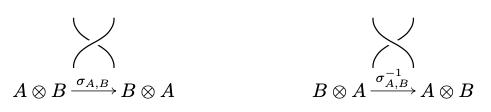

such that

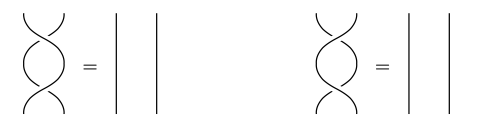

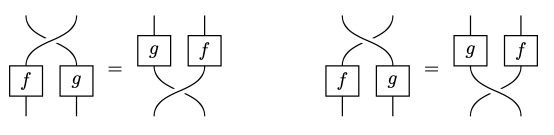

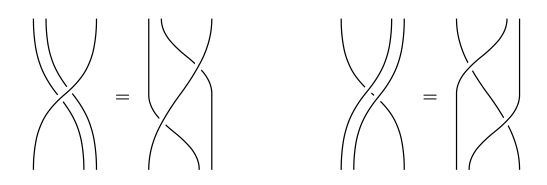

**Definition:** A braided monoidal category is symmetric if
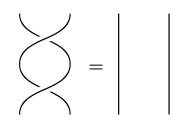

or equivalently
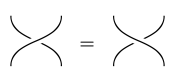

**Lemma:** In a braided monoidal category, we can prove the Yang-Baxter equation.
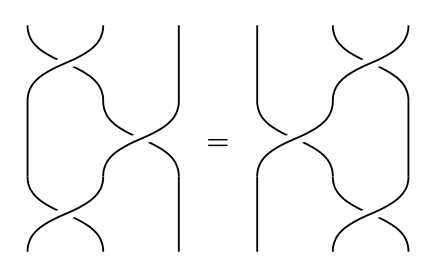
_Proof:_ Naturality + Hexagon.

### Compact closed categories

**Recall:** In a right-rigid monoidal category, for every $L$ there is a right adjoint $R$ and a pair of arrows:

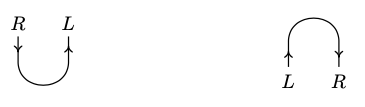

such that
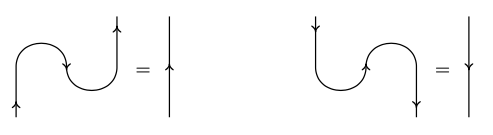

**Lemma:** In a braided monoidal category, left and right adjoints collapse.

_Proof:_ Define
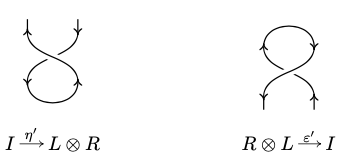

Then from naturality we get:

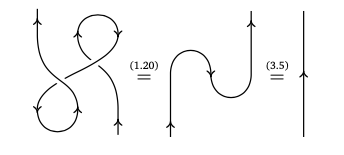

**Definition:** A compact closed category is a rigid symmetric monoidal category.

**Lemma:** In a compact closed category, the following equations hold:
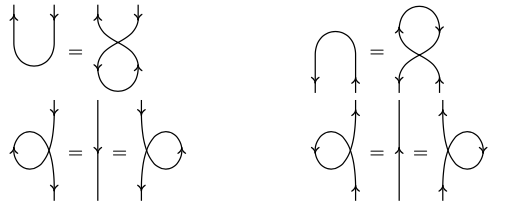

**Definition:** The transpose of a process is given by:
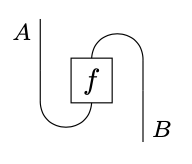

**Definition:** A $\dagger$ compact closed category is a compact closed category with a dagger, such that swaps are unitaries and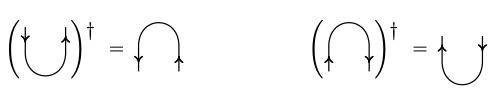

In a $\dagger$ compact closed category, we get a $\mathbb{Z}_2 \times \mathbb{Z}_2$ action on processes:
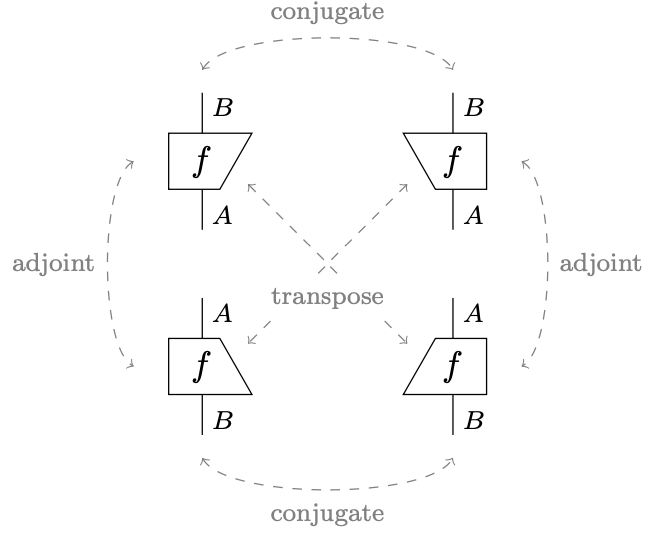

Compact closed categories allow to formulate the notion of **entanglement** in an abstract setting.

**Definition:** A state $w : 1 \to A \otimes B$ is separable when it can be written as a tensor $w = v \otimes v'$ for some $v : 1 \to A$ and $v' 1 \to B$.

**Definition:** A state $w : 1 \to A \otimes B$ is entangled if it is not separable.

**Lemma:** The cup of a non-trivial system is entangled.

_Proof:_ Suppose the cup is separable, then the identity factors through the unit.

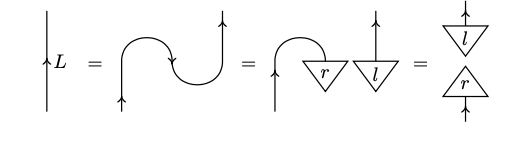

**Lemma (Teleportation):**
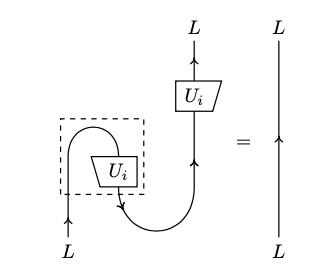

_Proof:_
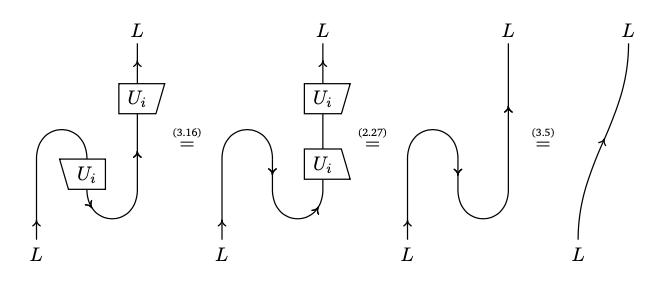

We can also formulate an abstract version of the **no-deleting** and **no-cloning** theorem.

**Definition:** Deleting is a natural transformation $e_A : A \to 1$ with $e_1 = 1$.

**Lemma:** A monoidal category has deleting if and only if $1$ is terminal.

**Theorem:** If a compact closed category has deleting, then it is a preorder.

_Proof:_ Take two parallel arrows $f, g : A \to B$, then their coname $\hat f, \hat g : A \otimes B^\star \to 1$ are equal, hence $f = g$.

**Definition:** Copying is an commutative, associative natural transformation $d_A : A \to A \otimes A$ such that:

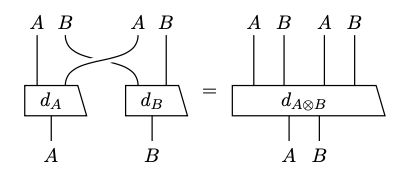

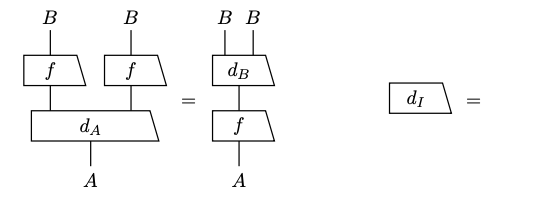

**Lemma:** If a braided monoidal category has copying, then:

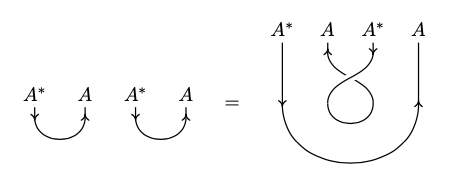

_Proof:_
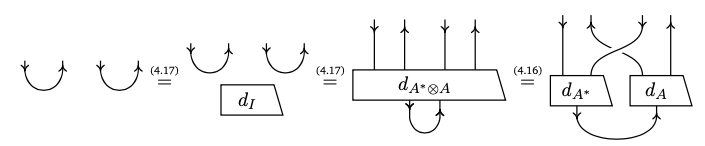

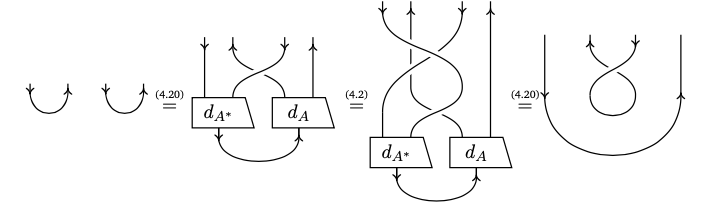

**Theorem:** If a compact closed category has copying, then: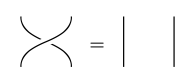

_Proof:_
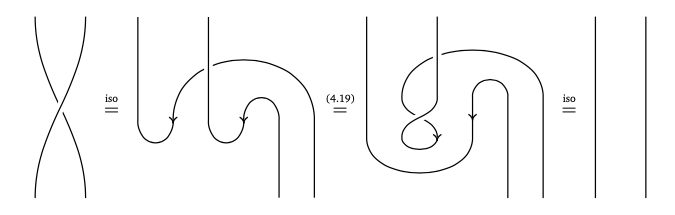

### Special commutative Frobenius algebras

**Definition:** A Frobenius algebra is a pair of a monoid and comonoid such that:
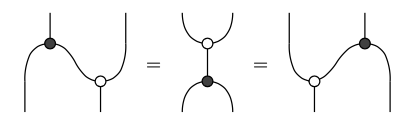

**Definition:** A Frobenius algebra is dagger when the dagger of multiplication is comultiplication, and the dagger of unit is counit.

**Definition:** A $\dagger$ Frobenius algebra is commutative when its monoid is commutative.

**Definition:** A $\dagger$ Frobenius algebra is special when 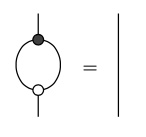

**Lemma:** Frobenius algebras are self-adjoint.

_Proof:_ Define cups and caps
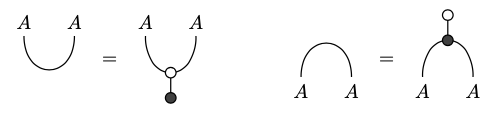

then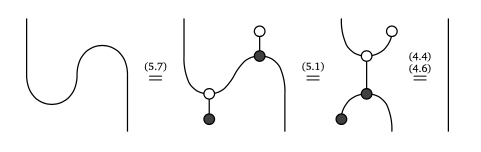

**Lemma:** Homomorphisms of Frobenius algebras are isomorphisms, with inverse given by

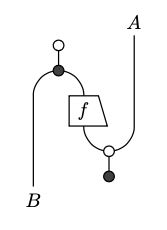

_Proof:_ Suppose $f$ is a homomorphism of Frobenius algebras.
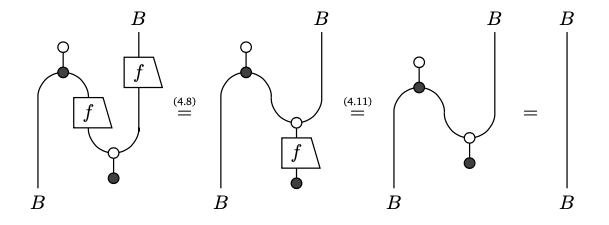

**Theorem (Spider Fusion):** Every connected diagram $d : A^{\otimes n} \to A^{\otimes m}$ generated by the co/monoid of a Frobenius algebra is equal to a spider-shaped diagram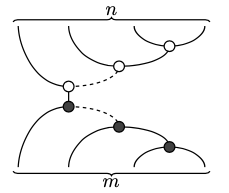

_Proof:_ By induction, we move all the black comonoid below the white monoid.

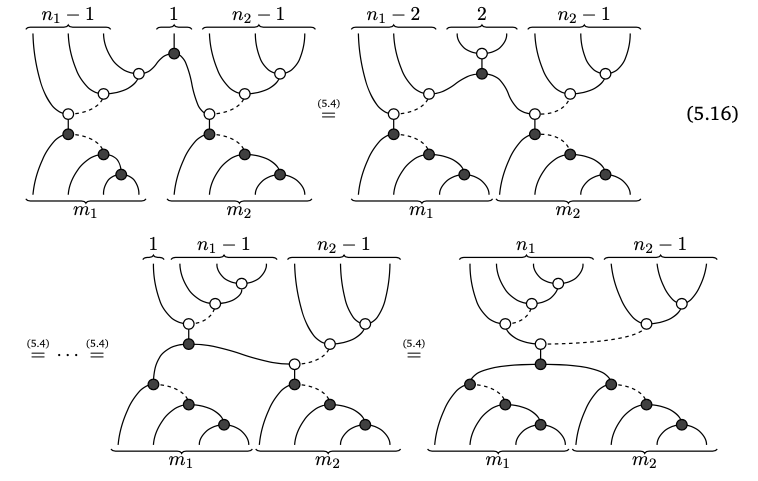

**Theorem (Artin–Wedderburn):** in $\mathbf{FHilb}$, $\dagger$ special commutative Frobenius algebras are in one-to-one correspondance with orthonormal bases.

_Proof:_ $C^\star$ algebra magic.

The correspondance sends a $\dagger$ SCFA to the basis of copyable states:
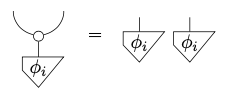

It sends a basis to the Frobenius algebra given by:
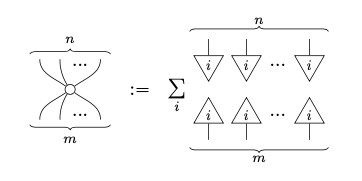

Frobenius algebras not only characterise bases in $\mathbf{Hilb}$, they also allow us to formulate an abstract notion of **phases**.

**Definition:** Given a $\dagger$SCFA, a phase is a state $a : 1 \to A$ such that:

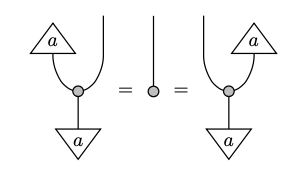

It defines a phase shift map, a.k.a. diagonal unitary matrices:
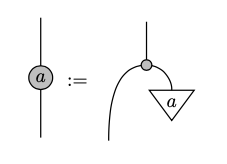

**Lemma:** Phases form a group.

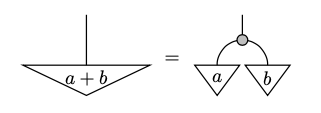

_Proof:_
Associativity and unit follow from that of Frobenius algebras. Define the inverse as follows.
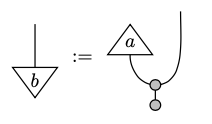

Then we get
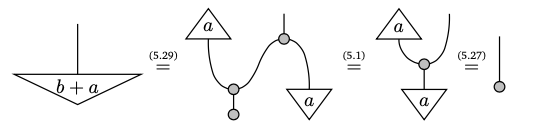

### Bialgebras and Hopf algebras

Now that we've characterised orthonormal bases, we can look at how they interact.

**Definition:** In a braided monoidal category, a bialgebra is a pair of monoid and comonoid such that:
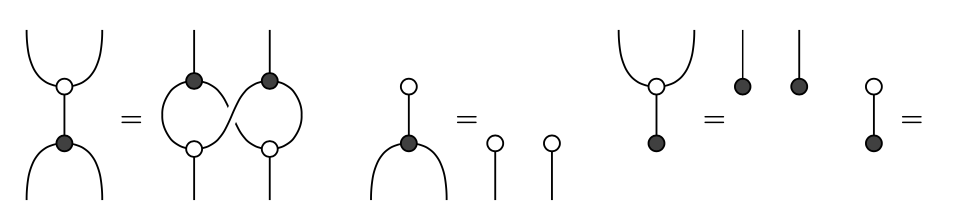

**Example:** In $\mathbf{Set}$, a bialgebra is a monoid.

**Definition:** A bialgebra is Hopf when it has an antipode $s : A \to A$ such that:

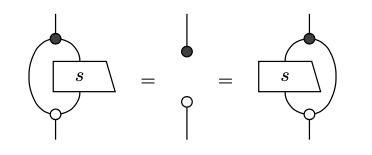

**Example:** In $\mathbf{Set}$, a Hopf algebra is a group.

**Theorem:** Two bases are complementary if and only if their corresponding Frobenius algebras obey the Hopf law.

_Proof:_ Define the antipode to be a zebra-snake.
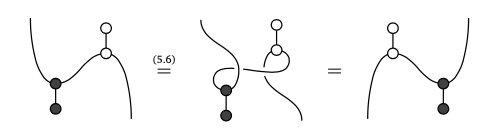

Then the Hopf law holds if and only if for all $a$ in the white basis and $b$ in the black basis:

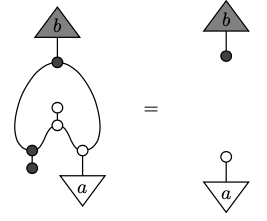

The right-hand side is equal to $1$ and the left-hand side simplifies to:

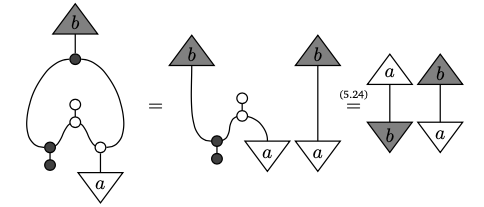

i.e. the probability $P(a \vert b)$ is constant.

## Qubit quantum computing

### The circuit model

**Definition:** A gateset is a monoidal signature $\Sigma$ with one generating object $\Sigma_0 = \{x\}$ and a monoidal functor $[\![-]\!] : C_\Sigma \to \mathbf{Hilb}$ with $[\![x]\!] = \mathbb{C}^2$ and for all gate $g \in \Sigma_1$, its evaluation $[\![g]\!]$ is unitary.

**Example:** Universal gateset $CX, H, Rx(\theta)$.

**Example:** Approximately universal $CX, H, T$.

**Definition:** A circuit with $n$-qubits is a diagram $d : x^{\otimes n} \to x^{\otimes n}$ in $C_\Sigma$.

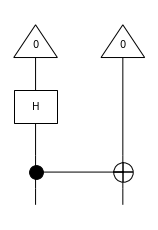

Tensor[complex]([0.70710678+0.j, 0.    +0.j, 0.    +0.j, 0.70710678+0.j], dom=Dim(1), cod=Dim(2, 2))

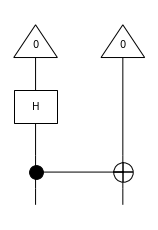

Tensor[complex]([0.70710678+0.j, 0.    +0.j, 0.    +0.j, 0.70710678+0.j], dom=Dim(1), cod=Dim(2, 2))

In [14]:
from discopy.quantum import Id, CX, H, Ket

circuit = Ket(0, 0) >> H @ Id(1) >> CX
circuit.draw(figsize=(2, 3))
circuit.eval()

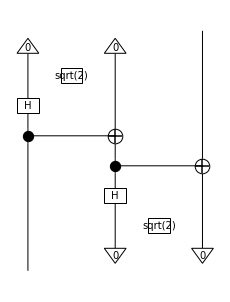

Tensor[complex]([1.+0.j, 0.+0.j, 0.+0.j, 1.+0.j], dom=Dim(2), cod=Dim(2))

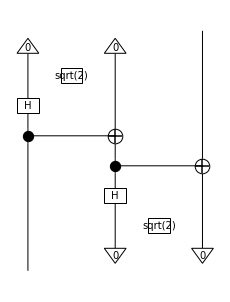

Tensor[complex]([1.+0.j, 0.+0.j, 0.+0.j, 1.+0.j], dom=Dim(2), cod=Dim(2))

In [15]:
Id(1).transpose().draw(figsize=(3, 4))
Id(1).transpose().eval()

Finding equations between unitary gates turns out to be difficult, even for two qubits.

**Reference:**
_Relations for Clifford+T operators on two qubits_, Peter Selinger and Xiaoning Bian ([slides](https://mathstat.dal.ca/~xbian/talks/slides_cliffordt2.pdf))

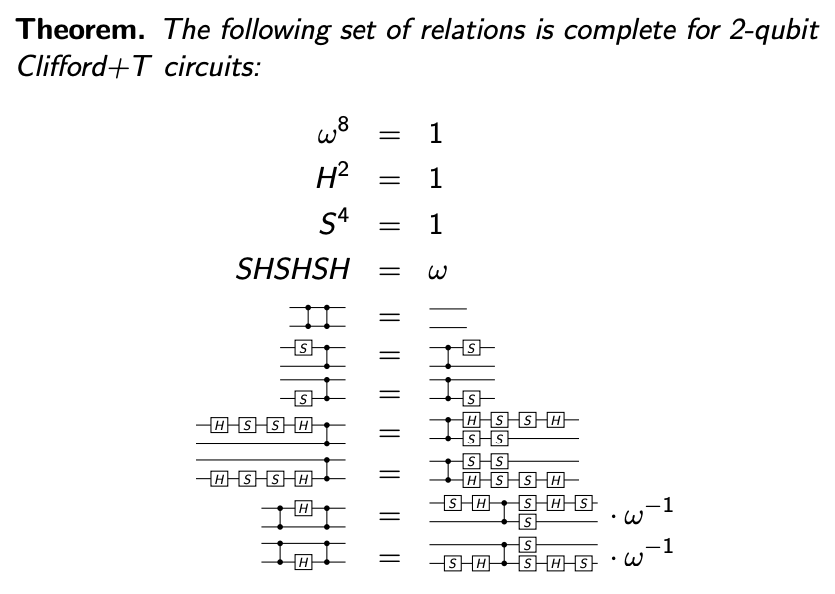

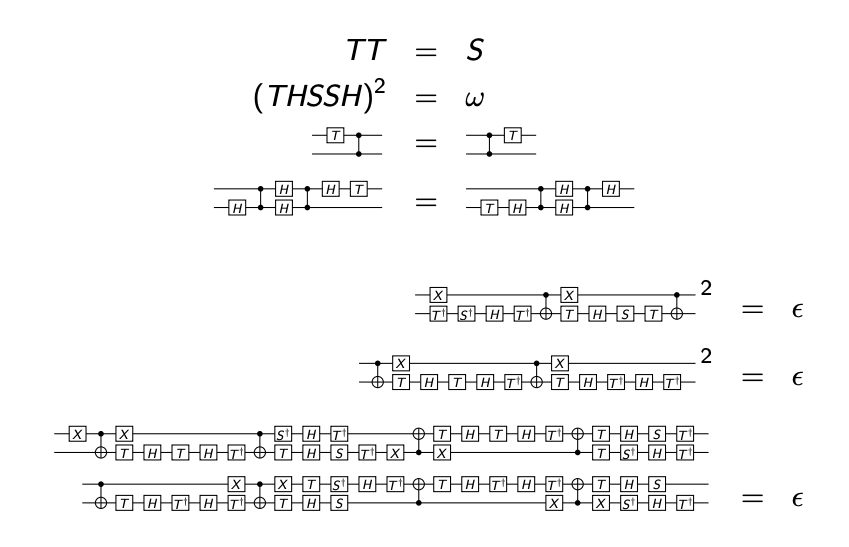

### ZX-calculus

It turns out that the presentation is much simpler if you axiomatize all of $\mathbf{FHilb}$ at once, rather than only unitaries. It also allows you to "open the black box" of gates.

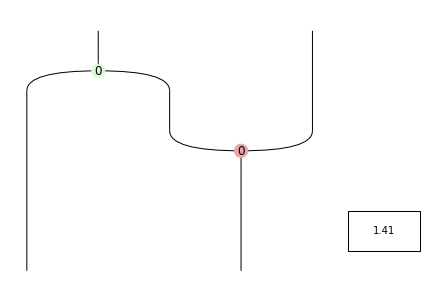

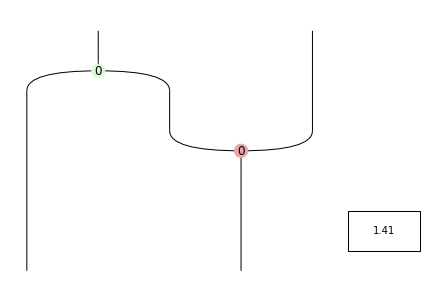

In [16]:
from discopy.quantum.zx import circuit2zx

circuit2zx(CX).draw()

The axioms are not arcane combinations of black boxes anymore, they come from the interaction of our two friends: $\dagger$ special commutative Frobenius algebras and Hopf algebras.

**Reference:** _A Near-Optimal Axiomatisation of ZX-Calculus for Pure
Qubit Quantum Mechanics_, Renaud Vilmart ([arXiv:1812.09114](https://arxiv.org/abs/1812.09114))

**See also:** [https://zxcalculus.com/](https://zxcalculus.com/)

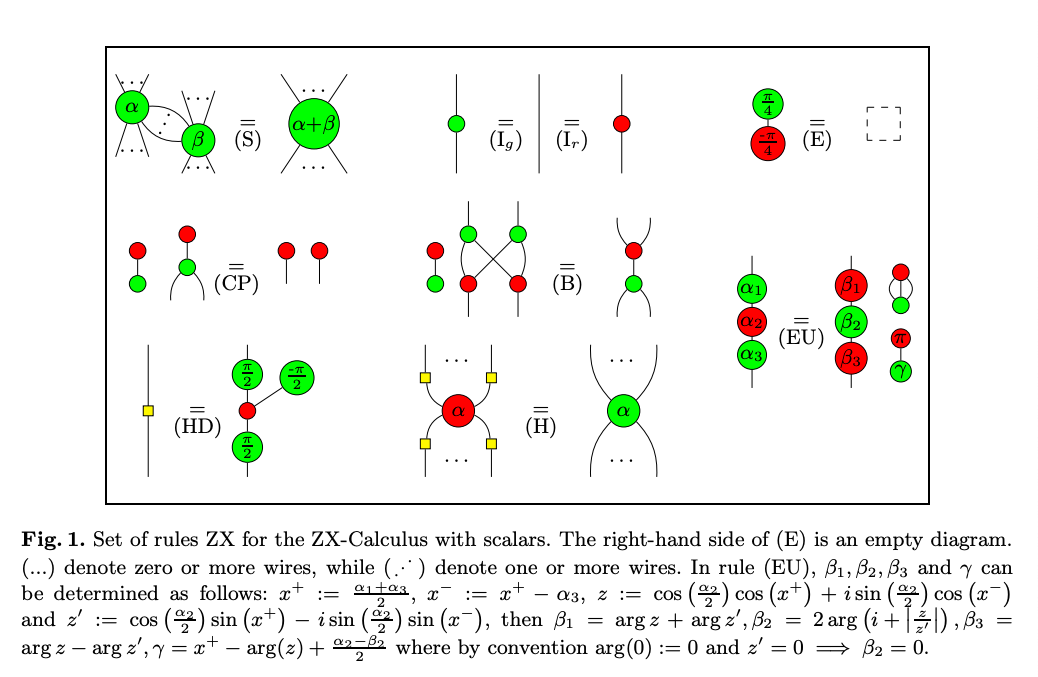

**Theorem:** The axioms above are complete for the subcategory of $\mathbf{Hilb}$ generated by $\mathbb{C}^2$.

## Applications

### Optimization

Quantum circuits can be simplified using the rules of the ZX calculus.

**References:**

* _Optimising Clifford Circuits with Quantomatic_, Fagan & Duncan ([arXiv:1901.10114](https://arxiv.org/abs/1901.10114))
* _Graph-theoretic Simplification of Quantum Circuits with the ZX-calculus_, Duncan et al. ([arXiv:1902.03178](https://arxiv.org/abs/1902.03178))
* _PyZX: Large Scale Automated Diagrammatic Reasoning_, Kissinger, van de Wetering ([arXiv:1904.04735](https://arxiv.org/abs/1904.04735))

The structure behind PyZX is a category of cospans of graphs.

### Compilation

We want to compile high-level circuits into low-level gates, and map logical qubits to physical qubits, subject to some architecture constraints on what pairs of qubits can interact.

**References:**

* _tket : A Retargetable Compiler for NISQ Devices_, Sivarajah et al. ([arXiv:2003.10611](http://arxiv.org/abs/2003.10611))
* _A Generic Compilation Strategy for the Unitary Coupled Cluster Ansatz_, Cowtan et al. ([arXiv:2007.10515](http://arxiv.org/abs/2007.10515))

Essentially, the data structure behind t|ket> is a free symmetric monoidal category.

### Extraction

Given a ZX diagram, which encodes a measurement-based quantum computation, we want to extract a unitary circuit.

**Reference:**

* _There and back again: A circuit extraction tale_, Backens et al. ([arXiv:2003.01664](https://arxiv.org/abs/2003.01664))

### QNLP

Given the grammar for a sentence, we map each word to circuits and compose them to solve some natural language processing task.

**Reference:**

* _Quantum Natural Language Processing on Near-Term Quantum Computers_, Meichanetzidis et al. ([arXiv:2005.04147](http://arxiv.org/abs/2005.04147))
* _Grammar-Aware Question-Answering on Quantum Computers_, Meichanetzidis et al. ([arXiv:2012.03756](http://arxiv.org/abs/2012.03756))